# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


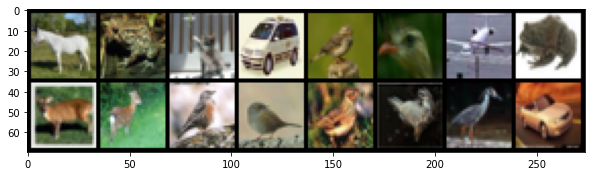

In [ ]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))



### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


#Fully Connected Layers

#### Defining model

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
           nn.Linear(3*32*32, 512),# Give me features of input
           nn.ReLU(),
           nn.Linear(512,256),
           nn.ReLU(),
           nn.Linear(256,128),
           nn.ReLU(),
           nn.Linear(128,32),
           nn.ReLU(),
           nn.Linear(32,10),
           nn.ReLU()

        )
        self.decoder = nn.Sequential(
           nn.Linear(10,32),
           nn.ReLU(),
           nn.Linear(32,128),
           nn.ReLU(),
           nn.Linear(128,256),
           nn.ReLU(),
           nn.Linear(256,512),
           nn.ReLU(),
           nn.Linear(512,3*32*32),
           torch.nn.Sigmoid() # doubt: what to use sigmoid or ReLU
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  # autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=3072, bias=True)
  (9): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			# inputs = Variable(inputs).data.cuda()
			inputs = inputs.reshape(16,3072) 
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad() 
			loss.backward()
			optimizer.step() #Performs a single optimization step (parameter update).
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.037
[2,  2000] loss: 0.030
[3,  2000] loss: 0.028
[4,  2000] loss: 0.027
[5,  2000] loss: 0.026
[6,  2000] loss: 0.026
[7,  2000] loss: 0.025
[8,  2000] loss: 0.025
[9,  2000] loss: 0.025
[10,  2000] loss: 0.025
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


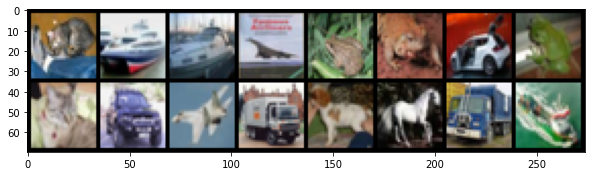

Reconstructed image


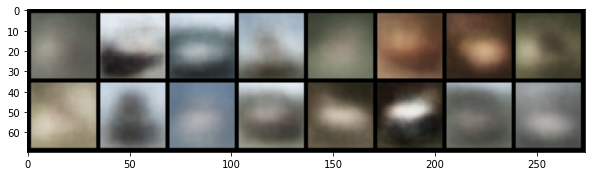

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
# images = Variable(images).cuda()
images=images.reshape(16,-1) # 16,(3,32,32) 
print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs= decoded_imgs.reshape(16,3,32,32)
imshow(torchvision.utils.make_grid(decoded_imgs.data))
# imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

#Convolutional Layers

### Defining Model

In [ ]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
          # conv layer (depth from 3 --> 16), 3x3 kernels
          nn.Conv2d(3, 16, 3, padding=1),
          nn.ReLU(),
          # conv layer (depth from 16 --> 4), 3x3 kernels
          # padding = 1 means input is same as output
          # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
          nn.MaxPool2d(2, 2), 
          nn.Conv2d(16, 4, 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2, 2)
        )
        self.decoder = nn.Sequential(
           nn.ConvTranspose2d(4, 16, 2, stride=2,padding=0),
           nn.ReLU(),
           nn.ConvTranspose2d(16, 3, 2, stride=2,padding=0),
           nn.Sigmoid() # doubt: what to use sigmoid or ReLU
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = ConvAutoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (1): ReLU()
  (2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
  (3): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			# inputs = inputs.reshape(16,3072)
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "convautoencoder.pt")

[1,  2000] loss: 0.018
[2,  2000] loss: 0.010
[3,  2000] loss: 0.010
[4,  2000] loss: 0.010
[5,  2000] loss: 0.010
[6,  2000] loss: 0.010
[7,  2000] loss: 0.010
[8,  2000] loss: 0.009
[9,  2000] loss: 0.009
[10,  2000] loss: 0.009
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/convautoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


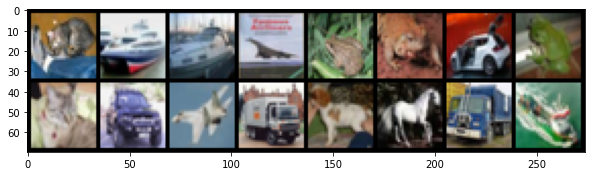

Reconstructed image


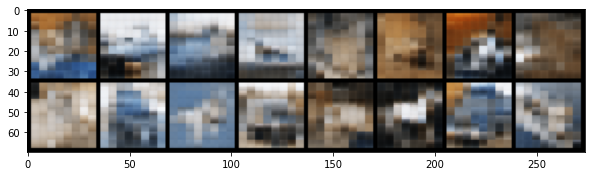

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
# images=images.reshape(16,-1) # 16,(3,32,32) 
print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs= decoded_imgs.reshape(16,3,32,32)
imshow(torchvision.utils.make_grid(decoded_imgs.data))

# Convolution + Fully Connected Layers 

### Defining Model

In [ ]:
class convFully(nn.Module):
    def __init__(self):
        super(convFully, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(

          # conv layer (depth from 3 --> 8), 4x4 kernels
          nn.Conv2d(3, 8, 5, padding=2),
          nn.ReLU(),
          # conv layer (depth from 16 --> 4), 3x3 kernels
          # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
          nn.MaxPool2d(2, 2), 
          nn.Conv2d(8, 16, 5, padding=2),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
          nn.Flatten(), # by default flattens everything
          nn.Linear(16 * 8 * 8, 32),
          nn.ReLU(),
          nn.Linear(32,10)


        )
        self.decoder = nn.Sequential(
           nn.Linear(10,32),
           nn.ReLU(),
           nn.Linear(32,16 * 8 * 8),
           nn.ReLU(),
           nn.Unflatten(dim=1,unflattened_size=(16, 8, 8)),
           nn.ConvTranspose2d(16,8,5, stride=2,output_padding=1,padding=2),
           nn.ReLU(),
           nn.ConvTranspose2d(8,3,5, stride=2,output_padding=1,padding=2),
           nn.Sigmoid() # doubt: what to use sigmoid or ReLU
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = convFully()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1024, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=1024, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(16, 8, 8))
  (5): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  (6): ReLU()
  (7): ConvTranspose2d(8, 3, kernel_size=(5, 5), stride=(2, 2), padding=(2

### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			# inputs = inputs.reshape(16,3,32,32)
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "convmlpautoencoder.pt")

[1,  2000] loss: 0.030
[2,  2000] loss: 0.022
[3,  2000] loss: 0.021
[4,  2000] loss: 0.021
[5,  2000] loss: 0.021
[6,  2000] loss: 0.021
[7,  2000] loss: 0.021
[8,  2000] loss: 0.021
[9,  2000] loss: 0.021
[10,  2000] loss: 0.021
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/convmlpautoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


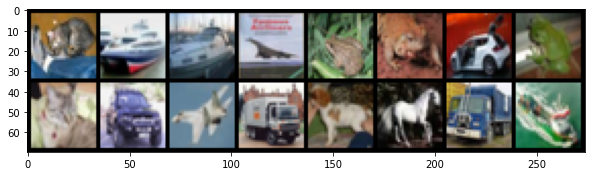

Reconstructed image


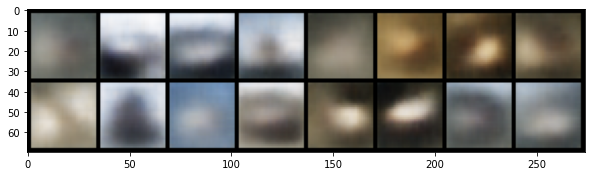

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
# images=images.reshape(16,-1) # 16,(3,32,32) 
print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs= decoded_imgs.reshape(16,3,32,32)
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Applications of Auto encoders:
1. Dimensionality reduction
2. Image denoising
3. Generation of image and time series data
4. Anomaly Detection
5. Feature Extraction

Some popular autoencoders are:

1. Undercomplete autoencoders
2. Sparse autoencoders
3. Contractive autoencoders
4. Denoising autoencoders
5. Variational Autoencoders (for generative modelling)

####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

####PCA vs Autoencoders:
1. PCA is fundamentally a linear transformation, where as  auto-encoders are capable to model complex non-linear functions.
2. Autoencoder is prone to overfitting due to high number of parameters unlike PCA.
3.  PCA features are projections onto the orthogonal basis, they are totally linearly uncorrelated. However, because autoencoded features are just trained for accurate reconstruction, they may have correlations.
4. A single layered autoencoder with a linear activation function is very much similar to PCA.
5. PCA hyperparameter is ‘k’ i.e. number of orthogonal dimensions to project data into while for Autoencoders it is the architecture of the neural network.
6. PCA is faster and computationally cheaper than autoencoders.


**Comparison in 2D Space** \
We will compare the capability of autoenocoders and PCA to accurately reconstruct the input after projecting it into latent space. PCA is a linear transformation with a well defined inverse transform and decoder output from autoencoder gives us the reconstructed input. 



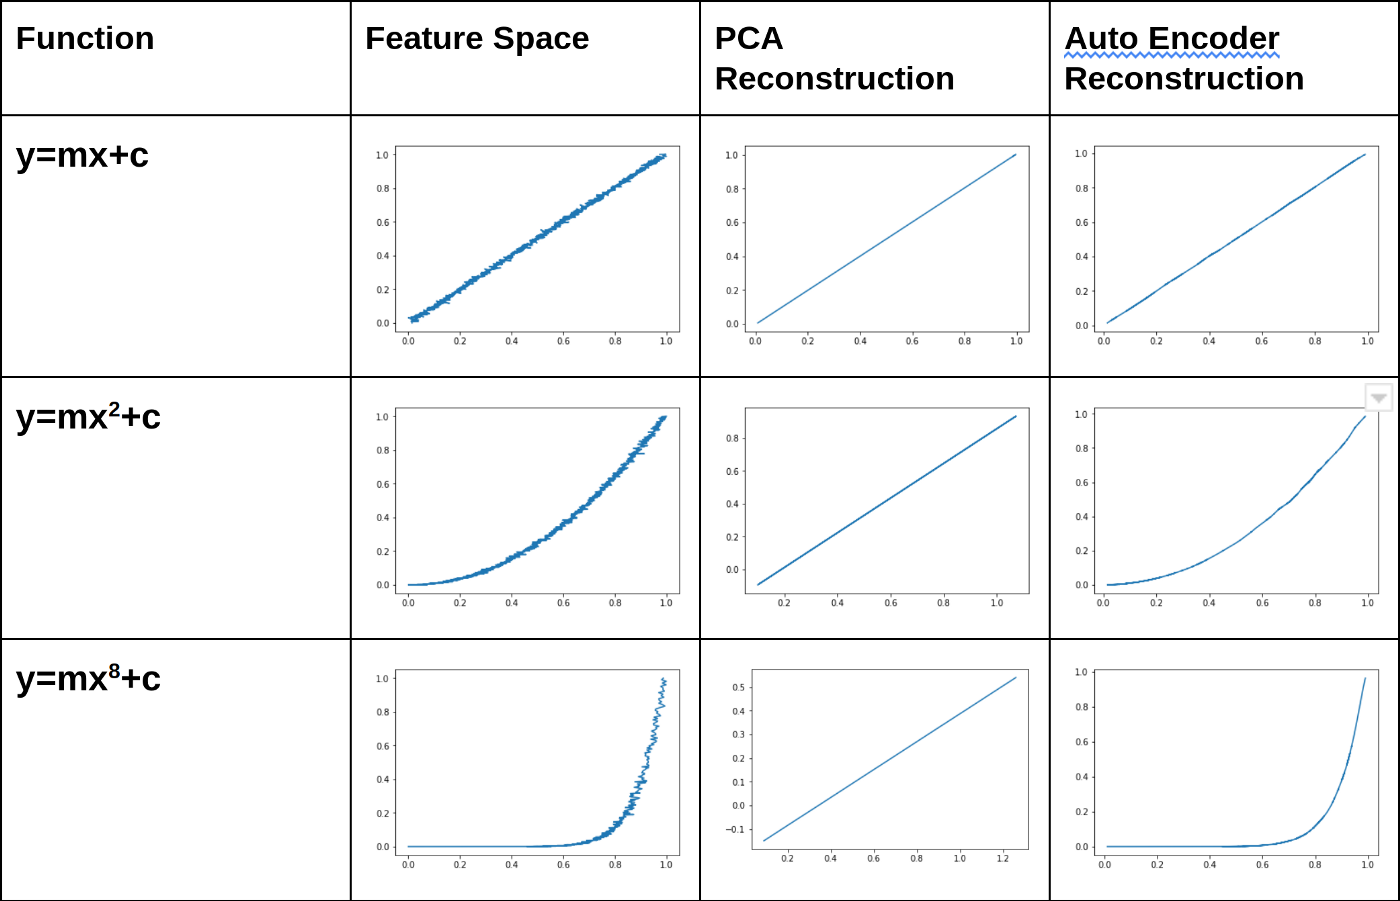

It is evident if there is a non linear relationship (or curvature) in the feature space, autoencoded latent space can be used for more accurate reconstruction. Where as PCA only retains the projection onto the first principal component and any information perpendicular to it is lost.

**Comparison in 3D Space**\
We create two three dimensional feature spaces. One is a 2D plane existing in 3D space and the other is a curved surface in 3D space.

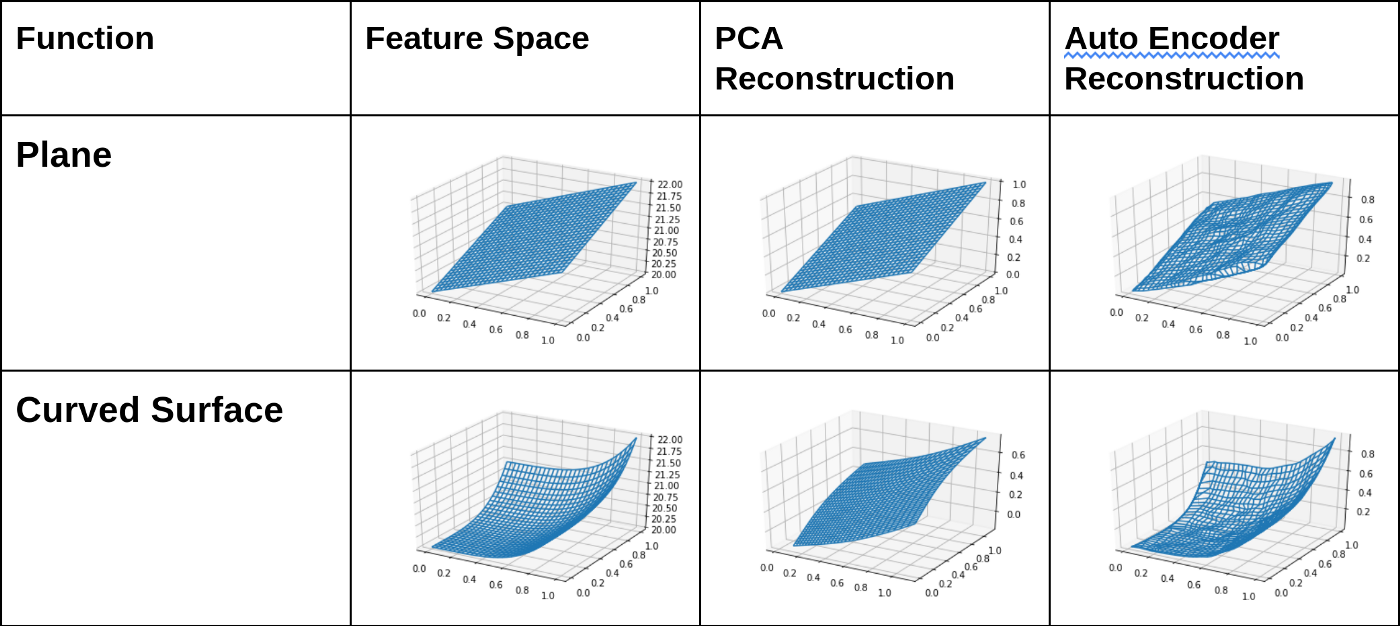

In the case of a plane, the data has a clear two-dimensional structure, and PCA with two components may account for 100 percent of the variance and so accomplish complete reconstruction. Two-dimensional PCA cannot account for all variation on a curved surface and consequently loses information. Autoencoder, on the other hand, can reliably recreate both plane and surface using two-dimensional latent space. Because it is capable of non-linear modelling, 2D latent space may encode more information in the case of autoencoder.